<a href="https://colab.research.google.com/github/ashthemagnificent/Homeworks/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing a Toy Covid Data: Predict Clinical Cases


In [3]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset Preparation

#### Loading Data

In [4]:
#read data from given xls ("COVID19 inpatient cases data.xls") (2nd sheet, not first sheet)
file_path = "/content/COVID19 inpatient cases data.xls"
data = pd.read_excel(file_path, sheet_name=1)
#look the first 5 records of data
print(data.head())

   Gender  Age Clinical classification  Days from symptoms to hospital  \
0    Male   47                   Heavy                              15   
1  Female   53                Ordinary                              13   
2  Female   57                Ordinary                              13   
3    Male   58                   Heavy                               1   
4    Male   54                Ordinary                              10   

  No comorbidity Cardiovascular and\ncerebrovascular disease  \
0              Y                                           N   
1              Y                                           N   
2              Y                                           N   
3              N                                           N   
4              Y                                           N   

  Endocrine system disease Malignant tumor Respiratory system disease  \
0                        N               N                          N   
1                       

In [5]:
# check column names, not null count and data types
print("Column Names:")
print(data.columns)
print("\nNon-Null Counts:")
print(data.info())
print("\nData Types:")
print(data.dtypes)

Column Names:
Index(['Gender', 'Age', 'Clinical classification',
       'Days from symptoms to hospital', 'No comorbidity',
       'Cardiovascular and\ncerebrovascular disease',
       'Endocrine system disease', 'Malignant tumor',
       'Respiratory system disease', 'Digestive system disease',
       'Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness',
       'Fatigue', 'Diarrhea', 'Others', 'Clinical outcome',
       'Hospital stay, days'],
      dtype='object')

Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      73 non-null     object 
 1   Age                                         73 non-null     int64  
 2   Clinical classification                     73 non-null     object 
 3   Days from symptoms to

#### Dataset preprocessing

##### Datasets for FIM and Rule extraction

In [6]:
symptom_cols = ['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']
# create df_symtoms dataframe including given columns
df_symptoms = data[symptom_cols].copy()
# add "Covid19" columns assign all entries as "Y"
df_symptoms['Covid19'] = 'Y'
print(df_symptoms.head())

  Fever Cough Chest tightness Fatigue Diarrhea Others Covid19
0     Y     Y               Y       Y        Y      N       Y
1     Y     Y               Y       N        N      N       Y
2     Y     Y               N       N        N      N       Y
3     N     N               N       N        N      N       Y
4     Y     Y               Y       N        N      N       Y


In [7]:
disease_cols = ['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease',
                'Digestive system disease','Renal disease','Liver disease']
other_cols= ['Age','Gender']
# create df_diseases dataframe consisting records of given cols(disease_cols and other_cols) from main dataframe
df_diseases = data[disease_cols + other_cols].copy()
# add also "Clinicial classification" attribute from main dataframe calling  this column as "Illness" in your df_diseases dataframe
df_diseases['Illness'] = data['Clinical classification']
# add " ill" string to all records in "illness" attribute
df_diseases1=df_diseases.copy()
df_diseases1['Illness'] = df_diseases['Illness'].astype(str) + ' ill'
print(df_diseases1.head())

  Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                           N                        N   
1                                           N                        N   
2                                           N                        N   
3                                           N                        Y   
4                                           N                        N   

  Malignant tumor Respiratory system disease Digestive system disease  \
0               N                          N                        N   
1               N                          N                        N   
2               N                          N                        N   
3               N                          N                        N   
4               N                          N                        N   

  Renal disease Liver disease  Age  Gender       Illness  
0             N             N   47    Male     Heavy ill 

In [8]:
# categorize ages as "Elderly" (Age>=65),
#                        "Adults" (18<= Age <65),
#                        "Teens" (12=<Age<18),
#                        "Children" (1<Age<11),
#                        "Infants" (Age<=1)
df_diseases1['Age Group'] = np.select([df_diseases['Age'] >= 65,
                                      (df_diseases['Age'] >= 18) & (df_diseases['Age'] < 65),
                                      (df_diseases['Age'] >= 12) & (df_diseases['Age'] < 18),
                                      (df_diseases['Age'] > 1) & (df_diseases['Age'] < 12),
                                      df_diseases['Age'] <= 1],
                                     ['Elderly', 'Adults', 'Teens', 'Children', 'Infants'])

# in new column "Age Group", drop "Age" column in df_disease dataframe.
df_diseases1 = df_diseases1.drop('Age', axis=1)
print(df_diseases1.head())

  Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                           N                        N   
1                                           N                        N   
2                                           N                        N   
3                                           N                        Y   
4                                           N                        N   

  Malignant tumor Respiratory system disease Digestive system disease  \
0               N                          N                        N   
1               N                          N                        N   
2               N                          N                        N   
3               N                          N                        N   
4               N                          N                        N   

  Renal disease Liver disease  Gender       Illness Age Group  
0             N             N    Male     Heavy ill 

In [9]:
# Convert "Gender", "Illness", "Age Group" attributes to dummies for one-hot encoding, \

# then drop these attributes from df_diseases
df_diseases1= pd.get_dummies(df_diseases1, columns=["Gender", "Illness", "Age Group"])

print(df_diseases1)

   Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                            N                        N   
1                                            N                        N   
2                                            N                        N   
3                                            N                        Y   
4                                            N                        N   
..                                         ...                      ...   
68                                           N                        N   
69                                           N                        Y   
70                                           Y                        N   
71                                           Y                        N   
72                                           Y                        N   

   Malignant tumor Respiratory system disease Digestive system disease  \
0                N       

In [10]:
# convert all data to bool (True or False) (by replacing or mapping attribute values ) for df_symptoms dataframe
df_symptoms1 = df_symptoms.copy()
df_symptoms1 = df_symptoms.replace({'Y': True, 'N': False})
print(df_symptoms1.head())

   Fever  Cough  Chest tightness  Fatigue  Diarrhea  Others  Covid19
0   True   True             True     True      True   False     True
1   True   True             True    False     False   False     True
2   True   True            False    False     False   False     True
3  False  False            False    False     False   False     True
4   True   True             True    False     False   False     True


In [11]:
# same for df_diseases dataframe
df_diseases2 = df_diseases1.copy()
df_diseases2 = df_diseases1.replace({0: False, 1: True, 'Y': True, 'N': False})
print(df_diseases2.head())

   Cardiovascular and\ncerebrovascular disease  Endocrine system disease  \
0                                        False                     False   
1                                        False                     False   
2                                        False                     False   
3                                        False                      True   
4                                        False                     False   

   Malignant tumor  Respiratory system disease  Digestive system disease  \
0            False                       False                     False   
1            False                       False                     False   
2            False                       False                     False   
3            False                       False                     False   
4            False                       False                     False   

   Renal disease  Liver disease  Gender_Female  Gender_Male  \
0          False       

In [12]:
!pip install mlxtend

In [13]:
# create "df_symptoms_extended" concatanating df_symptoms with df_diseases dummy attributes of "Gender", "Illness", "Age Group" and their records.
df_diseases_dummies = df_diseases2.drop(columns=disease_cols)
df_symptoms_extended = pd.concat([df_symptoms1, df_diseases_dummies], axis=1)
# drop "Covid19" attribute in extended dataframe
df_symptoms_extended.drop(columns=['Covid19'], inplace=True)
print(df_symptoms_extended.head())

   Fever  Cough  Chest tightness  Fatigue  Diarrhea  Others  Gender_Female  \
0   True   True             True     True      True   False          False   
1   True   True             True    False     False   False           True   
2   True   True            False    False     False   False           True   
3  False  False            False    False     False   False          False   
4   True   True             True    False     False   False          False   

   Gender_Male  Illness_Heavy ill  Illness_Ordinary ill  Age Group_Adults  \
0         True               True                 False              True   
1        False              False                  True              True   
2        False              False                  True              True   
3         True               True                 False              True   
4         True              False                  True              True   

   Age Group_Elderly  
0              False  
1              False  

#### Fill mising values with KNN

The usage of KNNImputer is not allowed.

In [14]:
# show missing record as (number of missings/total) (should be only "Hospital stay, days")
missing_ratio = data["Hospital stay, days"].isnull().sum() / len(data)
print(f"Missing record for 'Hospital stay, days': {missing_ratio:.2%}")

Missing record for 'Hospital stay, days': 5.48%


In [15]:
# copy dataframe df1 to df2
data2 = data.copy()
df2 = pd.DataFrame(data2)
df3 = df2.copy()
# convert bools and strings to numeric attributes ('Male':1, 'Female':2, 'Heavy':1, 'Ordinary':2, 'Y':1, 'N':0)

mapping = {
    'Male': 1,
    'Female': 2,
    'Heavy': 1,
    'Ordinary': 2,
    'Y': 1,
    'N': 0,
    'Improved and discharge' : 3,
    'Aggravated,transfer to superior hospital' : 2,
    'Aggravated,turn to ICU' : 1,
    'Died' : 0
}

df3.replace(mapping, inplace=True)
print(df3.head())

   Gender  Age  Clinical classification  Days from symptoms to hospital  \
0       1   47                        1                              15   
1       2   53                        2                              13   
2       2   57                        2                              13   
3       1   58                        1                               1   
4       1   54                        2                              10   

   No comorbidity  Cardiovascular and\ncerebrovascular disease  \
0               1                                            0   
1               1                                            0   
2               1                                            0   
3               0                                            0   
4               1                                            0   

   Endocrine system disease  Malignant tumor  Respiratory system disease  \
0                         0                0                           0   


In [16]:
from sklearn.preprocessing import MinMaxScaler


def min_max_scale(df):
    scaler = MinMaxScaler()
    numeric_columns = df.select_dtypes(include=['number']).columns
    boolean_columns = df.select_dtypes(include=['bool']).columns
    columns_to_scale = numeric_columns.difference(['Hospital stay, days']).difference(boolean_columns)


    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    return df, scaler


def inv_min_max_scale(df, scaler):
    # Extract numeric columns for inverse transformation
    numeric_columns = df.select_dtypes(include=['number']).columns
    boolean_columns = df.select_dtypes(include=['bool']).columns
    columns_to_scale = numeric_columns.difference(['Hospital stay, days']).difference(boolean_columns)
    # Inverse transform only numeric columns

    df[columns_to_scale] = scaler.inverse_transform(df[columns_to_scale])

    return df


In [17]:
from sklearn.neighbors import KNeighborsRegressor
def fill_missing_with_knn(df, k=7):
    nan_columns = df.columns[df.isnull().any()]

    for column in nan_columns:
        features = df.dropna(subset=[column])
        target = features.pop(column)

        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(features, target)

        missing_values = df[df[column].isnull()]
        predicted_values = model.predict(missing_values.drop(column, axis=1))

        df.loc[df[column].isnull(), column] = predicted_values

    return df

df4 = df3.copy()

# Min-max scale all attributes (including missing ones)
df4, scaler = min_max_scale(df4)
# Fill missing values based on KNeighborsRegressor regression
df4 = fill_missing_with_knn(df4)
# Inverse transform to original range
df_inverse = inv_min_max_scale(df4, scaler)

print(df_inverse)

    Gender   Age  Clinical classification  Days from symptoms to hospital  \
0      1.0  47.0                      1.0                            15.0   
1      2.0  53.0                      2.0                            13.0   
2      2.0  57.0                      2.0                            13.0   
3      1.0  58.0                      1.0                             1.0   
4      1.0  54.0                      2.0                            10.0   
..     ...   ...                      ...                             ...   
68     2.0  30.0                      2.0                            13.0   
69     2.0  59.0                      2.0                            10.0   
70     2.0  87.0                      2.0                            10.0   
71     2.0  56.0                      2.0                            20.0   
72     2.0  54.0                      2.0                             7.0   

    No comorbidity  Cardiovascular and\ncerebrovascular disease  \
0       

#### Dataset for classification task

In [18]:
# copy df1 to data_df datafarme
data_df = df4.copy()
# split data: label attribute 'Clinical classification' as Y, features as X (including nonmissing features)

# convert attribute values to 0 and 1 ('Y':1, 'N':0, 'Male':0, "Female":1)
#data_df['Clinical classification'] = data_df['Clinical classification'].map({'Ordinary': 0, 'Heavy': 1}).astype(int)
#data_df['Gender'] = data_df['Gender'].map({'Male': 0, 'Female': 1}).astype(int)
for column in data_df.columns:
    if column not in ['Gender', 'Clinical classification']+ data_df.select_dtypes(include=['number']).columns.tolist():
        data_df[column] = data_df[column].map({'N': 0, 'Y': 1})
label_column = 'Clinical classification'
features_columns = data_df.columns[data_df.columns != label_column]
#data_df.fillna(data_df.mean(), inplace=True)

X = data_df[features_columns]
Y = data_df[label_column]
print(data_df.head())

   Gender   Age  Clinical classification  Days from symptoms to hospital  \
0     1.0  47.0                      1.0                            15.0   
1     2.0  53.0                      2.0                            13.0   
2     2.0  57.0                      2.0                            13.0   
3     1.0  58.0                      1.0                             1.0   
4     1.0  54.0                      2.0                            10.0   

   No comorbidity  Cardiovascular and\ncerebrovascular disease  \
0             1.0                                          0.0   
1             1.0                                          0.0   
2             1.0                                          0.0   
3             0.0                                          0.0   
4             1.0                                          0.0   

   Endocrine system disease  Malignant tumor  Respiratory system disease  \
0                       0.0              0.0                         0

In [19]:
from sklearn.model_selection import train_test_split
# Split dataset as train and test set using sklearn (for random_state=44)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=44)

# x_train, x_val, y_test, y_test = # to-do
print("Train set shapes - x_train:", x_train.shape, "y_train:", y_train.shape)
print("Validation set shapes - x_val:", x_val.shape, "y_val:", y_val.shape)

Train set shapes - x_train: (58, 19) y_train: (58,)
Validation set shapes - x_val: (15, 19) y_val: (15,)


### Classification Part: Predicting Clinical Cases

#### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
# create ID3 Tree using sklearn
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=44)
#id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=44)
# impute missing values in x_train
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#x_train = imputer.fit_transform(x_train)
#x_val = imputer.fit_transform(x_val)

# train Decision Tree Classifier
dt_classifier.fit(x_train, y_train)
#id3_tree.fit(x_train, y_train)

# Predict classes for test data
y_pred = dt_classifier.predict(x_val)
#y_pred = id3_tree.predict(x_val)

# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix
accuracy_dt = accuracy_score(y_val, y_pred)
precision_dt = precision_score(y_val, y_pred)
recall_dt = recall_score(y_val, y_pred)
f1_dt = f1_score(y_val, y_pred)
test_error_dt = 1 - accuracy_dt
conf_matrix_dt = confusion_matrix(y_val, y_pred)
#           based on your defined functions

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Test Error:", test_error_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

Accuracy: 0.7333333333333333
Precision: 0.6
Recall: 0.6
F1 Score: 0.6
Test Error: 0.2666666666666667
Confusion Matrix:
[[3 2]
 [2 8]]


In [21]:
# !pip install dtreeplt
!pip install dtreeplt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00


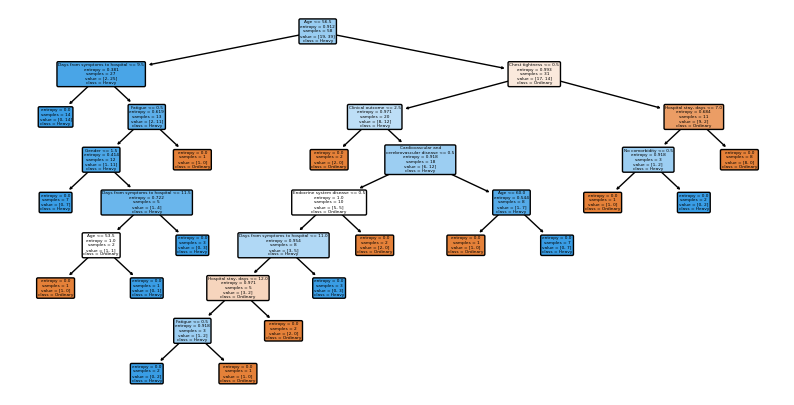

TypeError: Axes.annotate() missing 1 required positional argument: 'text'

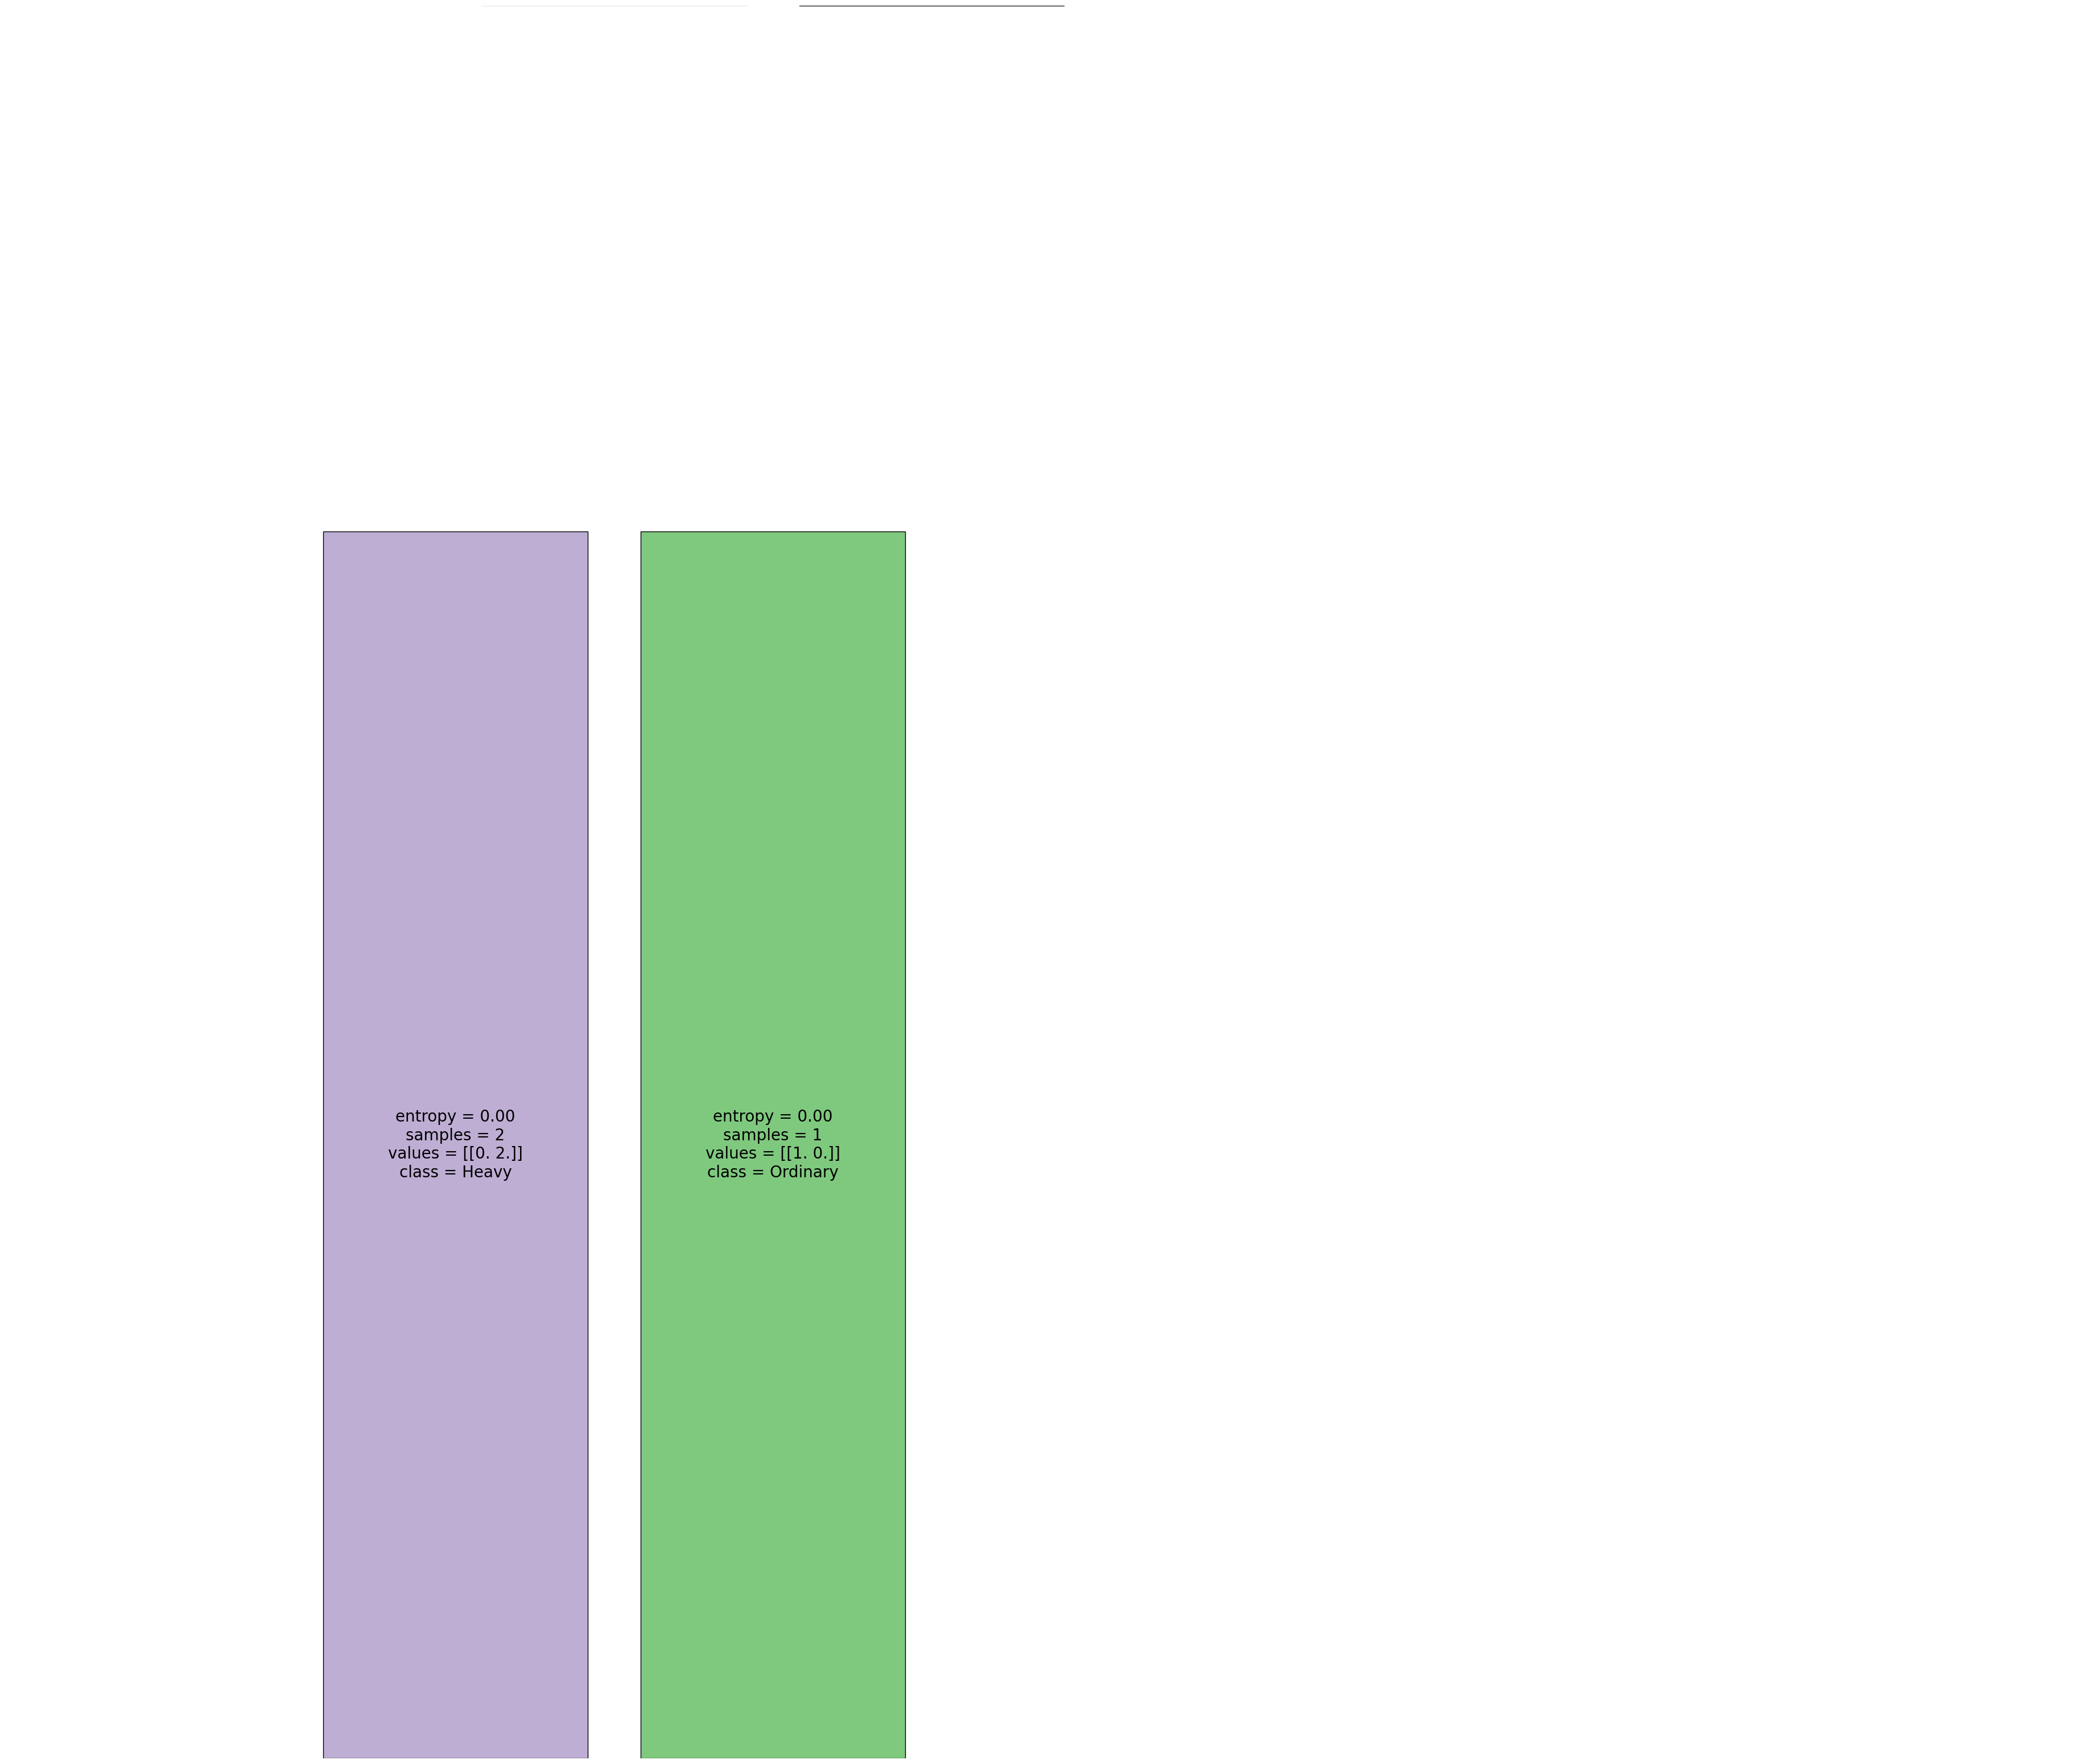

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from dtreeplt import dtreeplt

# visualize your tree using plot_tree inside sklearn and dtreeplt
plt.figure(figsize=(10, 5))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Ordinary', 'Heavy'], rounded=True)
plt.show()

dtree = dtreeplt(model=dt_classifier, feature_names=X.columns, target_names=['Ordinary', 'Heavy'])
fig = dtree.view()
fig.show()

#### KNN Classifier

Accuracy: 0.7333333333333333
Error: 0.2666666666666667
Precision: 0.6
Recall: 0.6
F1 Score: 0.6
Confusion Matrix:
[[3 2]
 [2 8]]


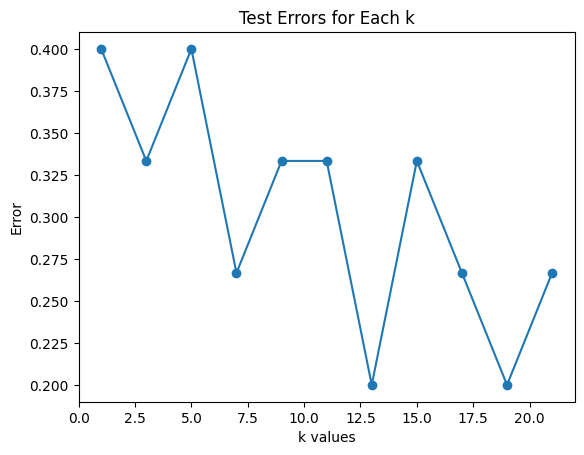

Best k value: 9


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_values = []
error_values = []
precision_values = []
recall_values = []
f1_values = []
conf_matrix_values = []
# classify test data with KNN classifier of sklearn (for each possible k value)
k_values = [1, 3, 5, 7, 9, 11, 13, 15,17,19,21]
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)

    # Predict classes for the validation data
    y_pred = knn_classifier.predict(x_val)

    # Calculate evaluation metrics
    accuracy_knn = accuracy_score(y_val, y_pred)
    error_knn = 1 - accuracy_knn
    precision_knn = precision_score(y_val, y_pred)
    recall_knn = recall_score(y_val, y_pred)
    f1_knn = f1_score(y_val, y_pred)
    conf_matrix_knn = confusion_matrix(y_val, y_pred)

    # Append values to lists
    accuracy_values.append(accuracy_knn)
    error_values.append(error_knn)
    precision_values.append(precision_knn)
    recall_values.append(recall_knn)
    f1_values.append(f1_knn)
    conf_matrix_values.append(conf_matrix_knn)

# Print the results
print(f"Accuracy: {accuracy_knn}")
print(f"Error: {error_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)
# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix
#           based on your defined functions (using k=7)

# plot test errors for each k
plt.plot(k_values, error_values, marker='o')
plt.title('Test Errors for Each k')
plt.xlabel('k values')
plt.ylabel('Error')
plt.show()

from sklearn.model_selection import GridSearchCV

# Example grid search for k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)


### Evaluation Part: Decision Boundries, ROC Curves, Performance Comparisons

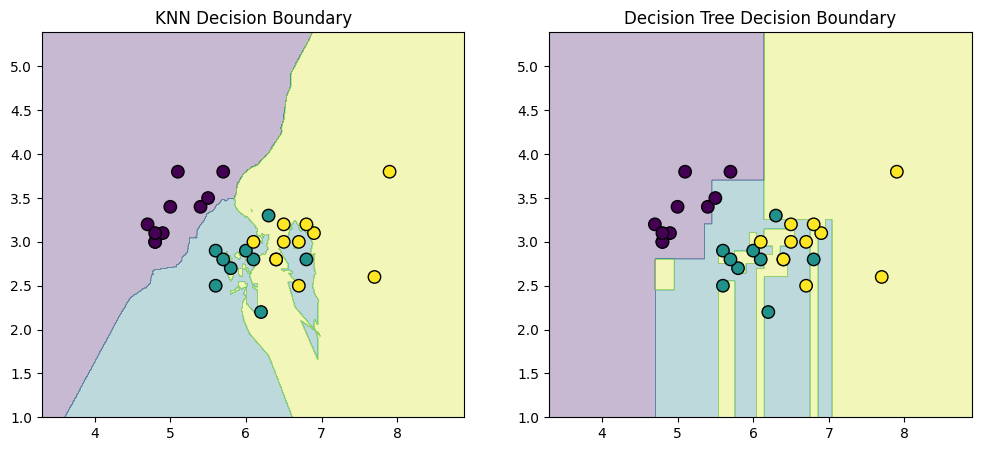

"# KNN decision boundary\nplt.subplot(1, 2, 2)\nZ_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])\nZ_knn = Z_knn.reshape(xx.shape)\ncmap_knn = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])\nplt.contourf(xx, yy, Z_knn, cmap=cmap_knn, alpha=0.3)\nplt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_knn, edgecolor='k', s=50)\nplt.title('KNN Decision Boundary')\n\nplt.show() "

In [24]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.colors import ListedColormap

# Load Iris dataset as an example
iris = load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=7)
dt_classifier = DecisionTreeClassifier(random_state=42)

classifiers = {'KNN': knn_classifier, 'Decision Tree': dt_classifier}

# Plot decision boundaries for each classifier
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Create a meshgrid to plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    if name == 'KNN':
        ax[0].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', marker='o', s=80)
        ax[0].set_title('KNN Decision Boundary')
    elif name == 'Decision Tree':
        ax[1].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', marker='o', s=80)
        ax[1].set_title('Decision Tree Decision Boundary')

plt.show()
'''pairwise = list(itertools.combinations(range(X.shape[1]), 2))
num_classifiers = len(classifiers)

plt.figure(figsize=(15, 8))

for i, (name, clf) in enumerate(classifiers.items(), start=1):
    for j, (feature1, feature2) in enumerate(pairwise, start=1):
        plt.subplot(num_classifiers, len(pairwise), (i-1)*len(pairwise) + j)

        # Train the classifier
        clf.fit(x_val.iloc[:, [feature1, feature2]].values, y_val)

        # Plot decision boundary
        h = 0.1  # Step size
        x_min, x_max = X.iloc[:, feature1].min() - 1, X.iloc[:, feature1].max() + 1
        y_min, y_max = X.iloc[:, feature2].min() - 1, X.iloc[:, feature2].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        plt.scatter(X.iloc[:len(y_val), feature1], X.iloc[:len(y_val), feature2], c=y_val, cmap=cmap, edgecolor='k', s=50)
        plt.title(f'{name} - Features {feature1+1} and {feature2+1}')

plt.tight_layout()
plt.show()
#x_train_array = x_train.astype('float').values
# Plot decision boundaries
''' #plt.figure(figsize=(12, 8))
'''
plt.subplot(1, 2, 1)
h = 0.02  # Step size
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_dt = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dt = Z_dt.reshape(xx.shape)
cmap_dt = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z_dt, cmap=cmap_dt, alpha=0.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_dt, edgecolor='k', s=50)
plt.title('Decision Tree Decision Boundary')
'''
'''# KNN decision boundary
plt.subplot(1, 2, 2)
Z_knn = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
cmap_knn = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z_knn, cmap=cmap_knn, alpha=0.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_knn, edgecolor='k', s=50)
plt.title('KNN Decision Boundary')

plt.show() '''

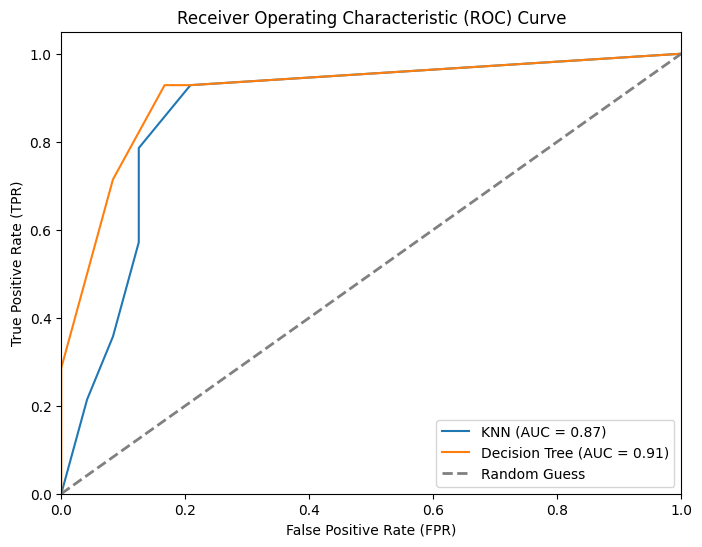

In [25]:
# draw ROC curves for each classifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = (iris.target == 2).astype(int)  # Convert to binary classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Create and fit classifiers with different parameters
classifiers = [
    {'name': 'KNN', 'classifier': KNeighborsClassifier(n_neighbors=5)},
    {'name': 'Decision Tree', 'classifier': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=2022)}
]

plt.figure(figsize=(8, 6))

for clf_info in classifiers:
    clf_name = clf_info['name']
    clf = clf_info['classifier']

    # Fit the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_pred = clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [26]:
# show classification results based on all measures (acc,err,recall, specifity, etc.) inside a table.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = (iris.target == 2).astype(int)  # Convert to binary classification

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Lists to store results
results = []

# KNN Classifier with k=7
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train, y_train)

# Predict classes for the validation data
y_pred_knn = knn_classifier.predict(x_val)

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_val, y_pred_knn)
error_rate_knn = 1 - accuracy_knn
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

# Calculate specificity
tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix_knn.ravel()
specificity_knn = tn_knn / (tn_knn + fp_knn)

# Append values to results list
results.append({
    'Classifier': 'KNN (k=7)',
    'Accuracy': accuracy_knn,
    'Error Rate': error_rate_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1': f1_knn,
    'Specificity': specificity_knn,
    'Confusion Matrix': conf_matrix_knn
})

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=44)
dt_classifier.fit(x_train, y_train)

# Predict classes for validation data
y_pred_dt = dt_classifier.predict(x_val)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_val, y_pred_dt)
error_rate_dt = 1 - accuracy_dt
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

# Calculate specificity
tn_dt, fp_dt, fn_dt, tp_dt = conf_matrix_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Append values to results list
results.append({
    'Classifier': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Error Rate': error_rate_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1': f1_dt,
    'Specificity': specificity_dt,
    'Confusion Matrix': conf_matrix_dt
})

# Create a DataFrame for the results
df_results = pd.DataFrame(results)

# Display the table
print("Classification Results:")
print(df_results)


Classification Results:
      Classifier  Accuracy  Error Rate  Precision    Recall        F1  \
0      KNN (k=7)  0.800000    0.200000   0.642857  0.692308  0.666667   
1  Decision Tree  0.666667    0.333333   0.416667  0.384615  0.400000   

   Specificity   Confusion Matrix  
0      0.84375  [[27, 5], [4, 9]]  
1      0.78125  [[25, 7], [8, 5]]  
